# CSI 4106 Introduction to Artificial Intelligence 
## Assignment 1: Data Preparation

## Report Title: Data Preparation and Feature Engineering for Machine Learning Classification

### Identification

Name: Alex Govier <br/>
Student Number: 300174954

### 1. Dataset Selection

#### Import Necessary Libraries

In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Read Datasets

Here I will read all the datasets and store them in their own respective variables and then in a list and separate list of names so they can be used later.

In [846]:
# Reading each dataset from my GitHub and then declaring them as individual variables
car_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/car_dataset.csv"
car_dataset = pd.read_csv(car_url)

credit_scores_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/credit_scores_dataset.csv"
credit_scores_dataset = pd.read_csv(credit_scores_url, dtype={"Payment_Behaviour": str}) # Needed low_memory option to suppress warning about mixed dtypes 

dermatology_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/dermatology_dataset.csv"
dermatology_dataset = pd.read_csv(dermatology_url)

glass_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/glass_dataset.csv"
glass_dataset = pd.read_csv(glass_url)

maternal_health_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/maternal_health_dataset.csv"
maternal_health_dataset = pd.read_csv(maternal_health_url)

sixteen_p_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/sixteen_p_dataset.csv"
sixteen_p_dataset = pd.read_csv(sixteen_p_url, encoding='ISO-8859-1') # Needed special encoding, the default of utf-8 wasn't working

wine_qt_url = "https://github.com/alex-govier5/intro-to-ai/raw/master/A1/wine_qt_dataset.csv"
wine_qt_dataset = pd.read_csv(wine_qt_url)

# Creating a list of the datasets and a separate list of arbitrary names for them
datasets = [car_dataset, credit_scores_dataset, dermatology_dataset, glass_dataset, maternal_health_dataset, sixteen_p_dataset, wine_qt_dataset]
dataset_names = ['Car Dataset', 'Credit Score Dataset', 'Dermatology Dataset', 'Glass Dataset', 'Maternal Health Dataset', '16P Dataset', 'Wine Dataset']

C:\Users\Owner\AppData\Local\Temp\ipykernel_28308\3744022528.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_scores_dataset = pd.read_csv(credit_scores_url, dtype={"Payment_Behaviour": str}) # Needed low_memory option to suppress warning about mixed dtypes


### 2. Exploratory Analysis

#### 1. Analysis of Missing Values

Here I will examine the datasets to identify and assess missing values in various attributes.

##### 1.1 Finding datasets and attributes with missing values

The datasets that contain missing values are the Credit Score Dataset and the Dermatology Dataset. Within the Credit Score Dataset, the 'Name', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', and 'Monthly_Balance' attributes all had missing values of some sort. Within the Dermatology Dataset, only the 'age' attribute had missing values of some sort.

##### 1.2 Describe Methodology Used For Investigation
I first create a list of generic missing value placeholders that could be used in the datasets, some of them I included simply by giving a quick glance to some datasets and seeing these placeholders a lot, like "_______" and "Not Specified" for example. <br/>
I then loop through each dataset and replace every placeholder value with NaN because Pandas can identify NaN values very efficiently, and this way I won't have to check multiple columns for multiple different potential placeholders, so the search becomes simpler. <br/>
I then check to see if the dataset contains any NaN values, if so I print the name of that dataset. <br/>
Then the columns for that dataset are checked and the ones that include NaN values will be listed so we are able to see which attributes contain the missing values. <br/>
I then display how many values are actually missing from each column with the sum() function just so I can make more informed decisions when it comes to imputation and which dataset I want to select for later use. <br/>
I also display how many total rows are in the dataset so I can have an idea of what percentage of data is actually missing from the given columns. <br/>
Otherwise, if the dataset contains no missing values, I state that in the else section.

In [847]:
# Create list of generic placeholders that could be used for missing values
missing_value_placeholders = ['?', '', 'NA', 'N/A', 'null', '-', '_______', 'Not Specified']

# Loop through each dataset
for i, dataset in enumerate(datasets):
    # Replace the placeholders with NaN so Pandas can recognize missing values easier
    dataset.replace(missing_value_placeholders, np.nan, inplace=True)

    # Check if there are any missing values
    if dataset.isnull().values.any():
        # Indicate the dataset has missing values
        print(f"{dataset_names[i]} has missing values.")
        
        # Find the columns with missing values
        missing_columns = dataset.columns[dataset.isnull().any()]
        print(f"Columns with missing values in {dataset_names[i]}: {missing_columns}\n")

        # Print the number of missing values per column
        print(dataset[missing_columns].isnull().sum())

        # Print total number of rows for reference
        print(f"Total rows: {len(dataset)}")
        print("\n")
        
    else:
        # Indicate that the dataset has no missing values otherwise
        print(f"{dataset_names[i]} has no missing values.\n")

Car Dataset has no missing values.

Credit Score Dataset has missing values.
Columns with missing values in Credit Score Dataset: Index(['Name', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

Name                        9985
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               12816
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64
Total rows: 100000


Dermatology Dataset has missing values.
Columns with missing values in Dermatology Dataset: Index(['age'], dtype='object')

age    8
dtype: int64
Total rows: 366


Glass Dataset has no missing values.

Maternal Health Dataset has no missing values.

16P Dataset has no missing values.

Wine Dataset has no missing

##### 1.3 Data Imputation Propositions
First I will give my suggestions for the Credit Scores dataset: <br/>
For the Name attribute, roughly 10% of the names are missing, since Name is a categorical attribute and will probably unique to most individuals, imputing a name might not be the best practice, and since this attribute won't be very useful for the model overall, I would suggest dropping the column in this case. <br/>
For the Occupation attribute, roughly 7% of them are missing, in this case I would use mode imputation to fill in the values with the most frequent occupation. <br/>
For the Monthly_Inhand_Salary attribute, roughly 15% of them are missing, since this is a continuous numeric attribute, I would probably use mean or median imputation, if I find the salary distribution is skewed, I would use median imputation to make sure the outliers aren't affecting the data too much. <br/>
For the Type_of_Loan attribute, roughly 13% are missing, I would again use mode imputation here since it is a categorical attribute. <br/>
For the Num_of_Delayed_Payment attribute, roughly 7% are missing, I would again consider using mean or median imputation because it's a continuous numeric attribute, median if the distribution is heavily skewed. <br/>
For the Num_Credit_Inquiries attribute, roughly 2% are missing, so again I would use mean or median imputation for the same reasons as above. <br/>
For the Credit_History_Age attribute, roughly 9% are missing, I would lean more towards the median imputation method here because the age of the credit history may be more likely to be skewed, but mean could still work well. <br/>
For the Amount_invested_monthly attribute, roughly 5% are missing, I would again use mean or median imputation here. <br/>
For the Monthly_Balance attribute, roughly 1% are missing, so again mean or median imputation should work well here. <br/> <br/>
Now for the Dermatology dataset: <br/>
For the age attribute, roughly 2% of the ages are missing, so since age is numeric and a very small percentage is missing, I again think a median or mean imputation method would work best. <br/>
These would be my suggestions for the data imputation of the missing values.

#### 2. Selecting a Classification Task
The dataset I will select for my classification task is the Credit Scores dataset. This dataset stores customer information and their associated credit scores. Plenty of useful, relevant information about the customers is stored in this dataset, like annual incomes, number of delayed payments, credit utilization ratio, outstanding debt, just to name a few. So this seems like a great dataset to work with, and I will provide further justification for selecting this dataset below. <br/>
For the classification task, I have decided to try and predict a customer's credit score based on numerous attributes from the Credit Scores dataset. <br/>
I have chosen this task because it has real-world relevance, as predicting credit scores is a common use case in the finance industry for determining different things like loans, interest rates, credit limits etc. <br/>
I am also working with a very feature rich dataset, by being able to include mutliple relevant attributes, my predictions should end up being quite accurate in theory. I also have a very large dataset, with 100,000 total rows, it is by far the largest dataset out of all the initial sets looked at. So I will have plenty of rich data to work with when making predictions. And I already have an imputation strategy as outlined above for filling in missing values, so the missing values shouldn't cause too many problems for the predictions. <br/>

##### 2.1 Objective of Task
As mentioned above, the objective of this classification task will be to accurately predict a customer's credit score based off of the relevant attributes in the dataset. In terms of applications, it can be used to determine loan eligibility, interest rates, credit limits and more for a given customer. I personally don't possess a lot of expertise in these particular domain applications, however I'm sure I will be able to learn a lot from this classification task. In the next section I will focus on which attributes to analyze during classification so that I can make the most accurate predictions possible.

#### 3. Attribute Analysis
Here I will analyze the attributes in my dataset to see which ones should be included in my investigation.

##### 3.1 Determining Attribute Informativeness
The attributes in this case that lack informativeness are the Cusomter_ID, Month, SSN, ID, Name, and Payment_of_Min_Account. These attributes don't directly impact a user's credit scores so I will not be considering them during classification, they will likely affect the effectiveness of the machine learning analysis. There are other attributes which have relevance to the credit score but perhaps slightly less than some of the other attributes. These attributes are Occupation, Delay_from_due_date, Changed_Credit_Limit, Total_EMI_per_month, Credit_History_Age and Amount_invested_monthly. I will also be excluding these attributes for classification but I may include them later on if I see that their inclusion leads to more accurate results. If I do end up including them I will make it clear below. So the 11 attributes I will be including (initially) are: <br/>
Annual_Income <br/>
Monthly_Inhand_Salary <br/>
Num_Bank_Accounts <br/>
Num_Credit_Card<br/>
Interest_Rate<br/>
Num_of_Loan<br/>
Num_of_Delayed_Payment<br/>
Num_Credit_Inquiries<br/>
Outstanding_Debt<br/>
Credit_Utilization_Ratio<br/>
Payment_Behaviour

##### 3.2 Examining Distributions of Each Attribute
Here I will examine the distribution of each attribute that I selected for classification, I will utilize histograms and boxplots to visualize the distributions. The code for this is below.

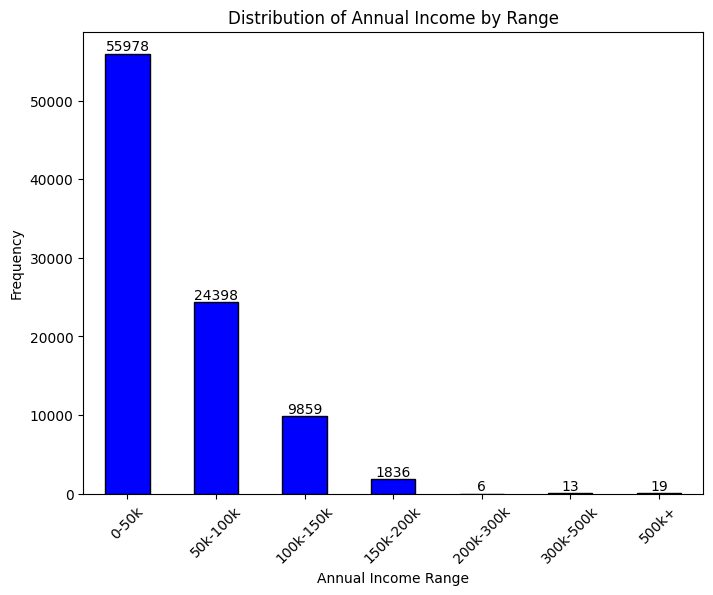

In [848]:
# Creating a histogram for the annual income attribute
# Convert the 'Annual_Income' column to numeric, forcing errors to NaN
credit_scores_dataset['Annual_Income'] = pd.to_numeric(credit_scores_dataset['Annual_Income'], errors='coerce')

# Define income bins and labels
income_bins = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-500k', '500k+']

# Create a new column for the binned income
credit_scores_dataset['Income_Range'] = pd.cut(credit_scores_dataset['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Count the occurrences of each income range
income_counts = credit_scores_dataset['Income_Range'].value_counts().sort_index()

# Now plot the histogram for the binned data
plt.figure(figsize=(8, 6))
bar_plot = income_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels to the bars
for bar in bar_plot.patches:
    bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Annual Income by Range')
plt.xlabel('Annual Income Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

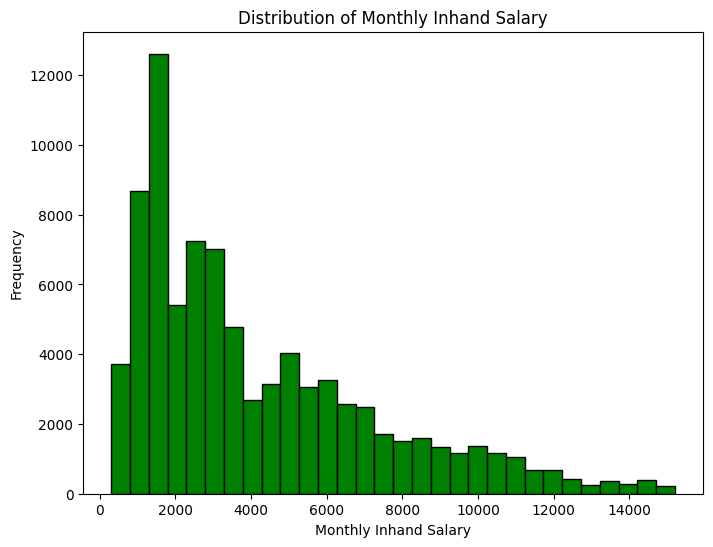

In [849]:
# Creating histogram for the monthly inhand salary
plt.figure(figsize=(8, 6))
plt.hist(credit_scores_dataset['Monthly_Inhand_Salary'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()


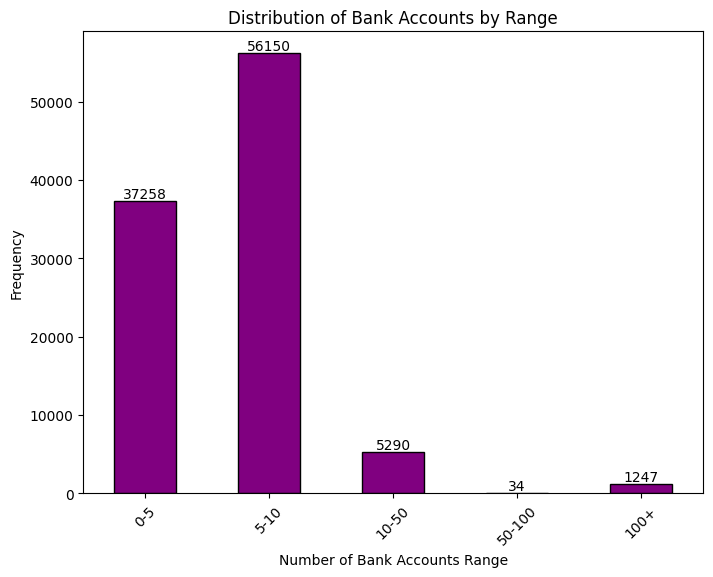

In [850]:
# Creating a histogram for number of bank accounts
credit_scores_dataset['Num_Bank_Accounts'] = pd.to_numeric(credit_scores_dataset['Num_Bank_Accounts'], errors='coerce')

# Creat the bins
bank_account_bins = [0, 5, 10, 50, 100, 10000]
bank_account_labels = ['0-5', '5-10', '10-50', '50-100', '100+']
credit_scores_dataset['Bank_Account_Range'] = pd.cut(credit_scores_dataset['Num_Bank_Accounts'], bins=bank_account_bins, labels=bank_account_labels, right=False)

# Count the occurrences of each range
bank_account_counts = credit_scores_dataset['Bank_Account_Range'].value_counts().sort_index()

# Now plot the histogram for the binned data
plt.figure(figsize=(8, 6))
bank_account_bar_plot = bank_account_counts.plot(kind='bar', color='purple', edgecolor='black')

# Add labels to the bars
for bar in bank_account_bar_plot.patches:
    bank_account_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Bank Accounts by Range')
plt.xlabel('Number of Bank Accounts Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

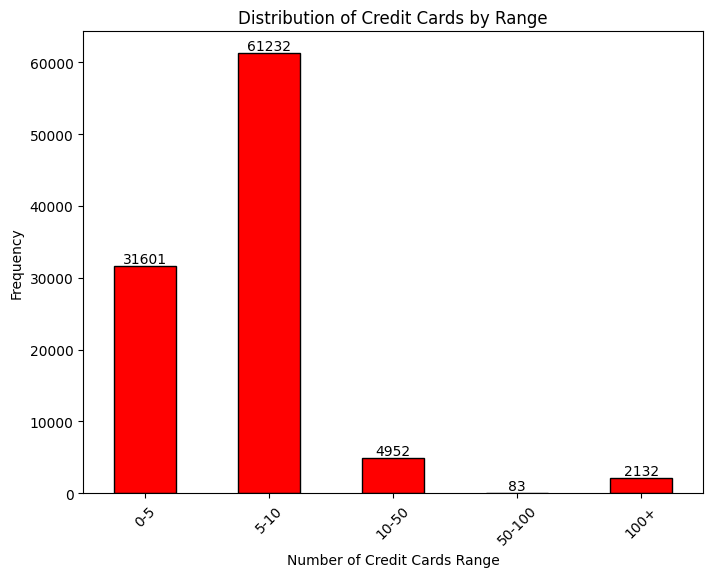

In [851]:
# Creating a histogram for number of credit cards
credit_scores_dataset['Num_Credit_Card'] = pd.to_numeric(credit_scores_dataset['Num_Credit_Card'], errors='coerce')

# Define bins and labels for Num_Credit_Card
credit_card_bins = [0, 5, 10, 50, 100, 10000]
credit_card_labels = ['0-5', '5-10', '10-50', '50-100', '100+']
credit_scores_dataset['Credit_Card_Range'] = pd.cut(credit_scores_dataset['Num_Credit_Card'], bins=credit_card_bins, labels=credit_card_labels, right=False)

# Count the occurrences of each credit card range
credit_card_counts = credit_scores_dataset['Credit_Card_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
credit_card_bar_plot = credit_card_counts.plot(kind='bar', color='red', edgecolor='black')

# Add labels to the bars
for bar in credit_card_bar_plot.patches:
    credit_card_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Credit Cards by Range')
plt.xlabel('Number of Credit Cards Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


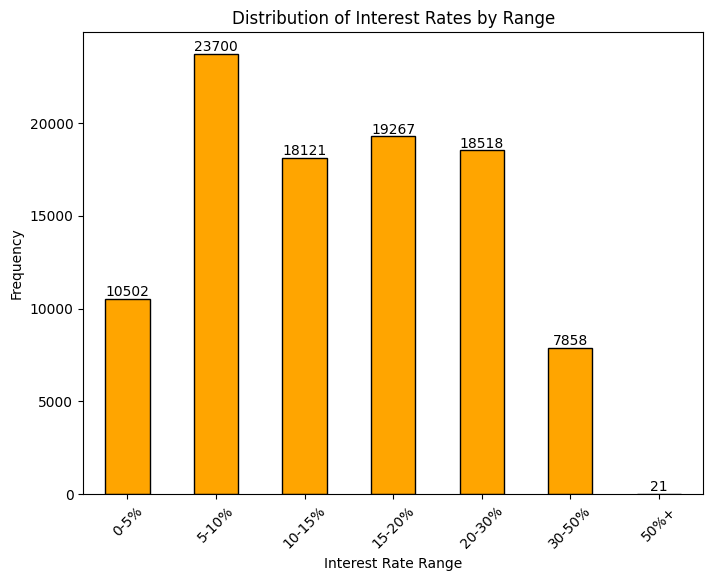

In [852]:
# Creating a histogram for interest rates
credit_scores_dataset['Interest_Rate'] = pd.to_numeric(credit_scores_dataset['Interest_Rate'], errors='coerce')

# Define bins and labels for Interest_Rate
interest_rate_bins = [0, 5, 10, 15, 20, 30, 50, 100]
interest_rate_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-30%', '30-50%', '50%+']
credit_scores_dataset['Interest_Rate_Range'] = pd.cut(credit_scores_dataset['Interest_Rate'], bins=interest_rate_bins, labels=interest_rate_labels, right=False)

# Count the occurrences of each interest rate range
interest_rate_counts = credit_scores_dataset['Interest_Rate_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
interest_rate_bar_plot = interest_rate_counts.plot(kind='bar', color='orange', edgecolor='black')

# Add labels to the bars
for bar in interest_rate_bar_plot.patches:
    interest_rate_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Interest Rates by Range')
plt.xlabel('Interest Rate Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


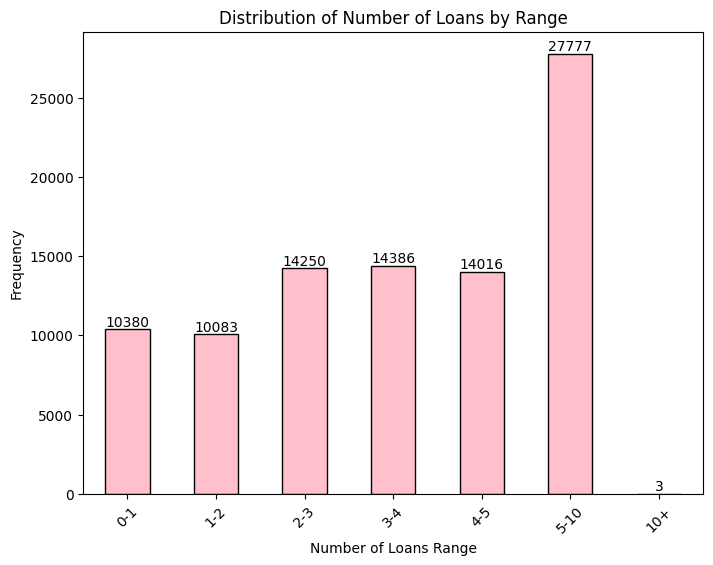

In [853]:
# Creating a histogram for number of loans
credit_scores_dataset['Num_of_Loan'] = pd.to_numeric(credit_scores_dataset['Num_of_Loan'], errors='coerce')

# Define bins and labels for Num_of_Loan
loan_bins = [0, 1, 2, 3, 4, 5, 10, 20]
loan_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10+']
credit_scores_dataset['Loan_Range'] = pd.cut(credit_scores_dataset['Num_of_Loan'], bins=loan_bins, labels=loan_labels, right=False)

# Count the occurrences of each loan range
loan_counts = credit_scores_dataset['Loan_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
loan_bar_plot = loan_counts.plot(kind='bar', color='pink', edgecolor='black')

# Add labels to the bars
for bar in loan_bar_plot.patches:
    loan_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Number of Loans by Range')
plt.xlabel('Number of Loans Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

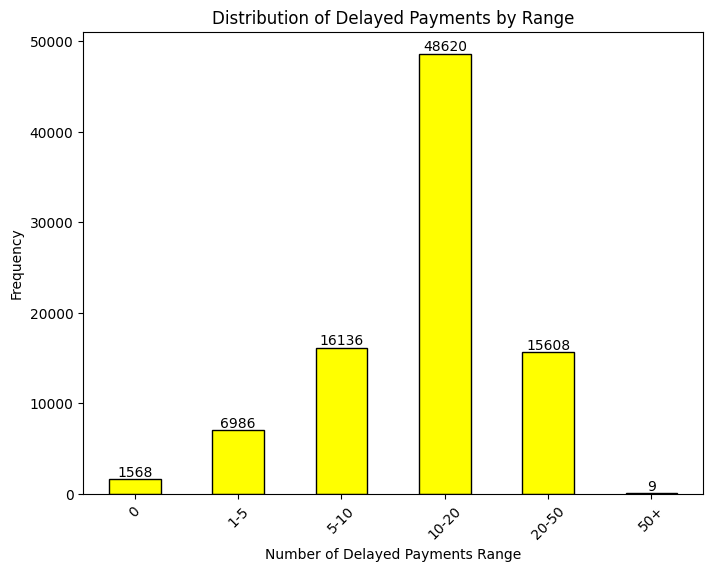

In [854]:
# Create a histogram for number of delayed payments
credit_scores_dataset['Num_of_Delayed_Payment'] = pd.to_numeric(credit_scores_dataset['Num_of_Delayed_Payment'], errors='coerce')

# Define bins and labels for Num_of_Delayed_Payment
delayed_payment_bins = [0, 1, 5, 10, 20, 50, 100]
delayed_payment_labels = ['0', '1-5', '5-10', '10-20', '20-50', '50+']
credit_scores_dataset['Delayed_Payment_Range'] = pd.cut(credit_scores_dataset['Num_of_Delayed_Payment'], bins=delayed_payment_bins, labels=delayed_payment_labels, right=False)

# Count the occurrences of each delayed payment range
delayed_payment_counts = credit_scores_dataset['Delayed_Payment_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
delayed_payment_bar_plot = delayed_payment_counts.plot(kind='bar', color='yellow', edgecolor='black')

# Add labels to the bars
for bar in delayed_payment_bar_plot.patches:
    delayed_payment_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Delayed Payments by Range')
plt.xlabel('Number of Delayed Payments Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


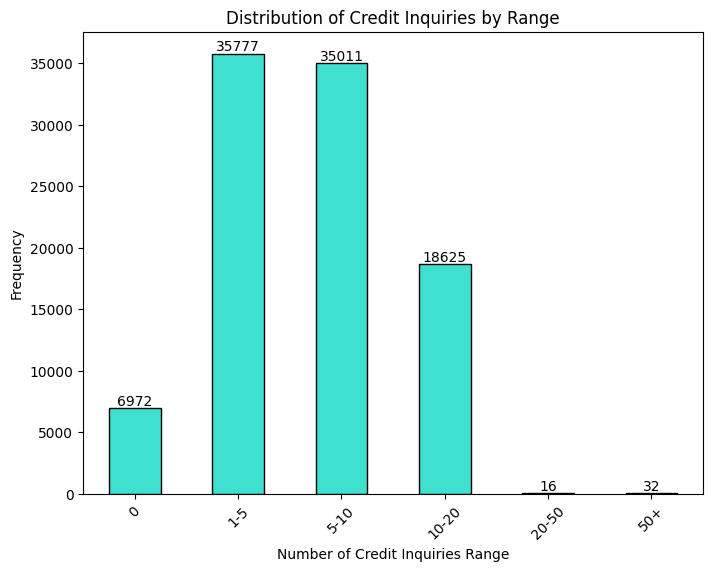

In [855]:
# Create a histogram for number of credit inquiries
credit_scores_dataset['Num_Credit_Inquiries'] = pd.to_numeric(credit_scores_dataset['Num_Credit_Inquiries'], errors='coerce')

# Define bins and labels for Num_Credit_Inquiries
credit_inquiry_bins = [0, 1, 5, 10, 20, 50, 100]
credit_inquiry_labels = ['0', '1-5', '5-10', '10-20', '20-50', '50+']
credit_scores_dataset['Credit_Inquiry_Range'] = pd.cut(credit_scores_dataset['Num_Credit_Inquiries'], bins=credit_inquiry_bins, labels=credit_inquiry_labels, right=False)

# Count the occurrences of each credit inquiry range
credit_inquiry_counts = credit_scores_dataset['Credit_Inquiry_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
credit_inquiry_bar_plot = credit_inquiry_counts.plot(kind='bar', color='turquoise', edgecolor='black')

# Add labels to the bars
for bar in credit_inquiry_bar_plot.patches:
    credit_inquiry_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Credit Inquiries by Range')
plt.xlabel('Number of Credit Inquiries Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


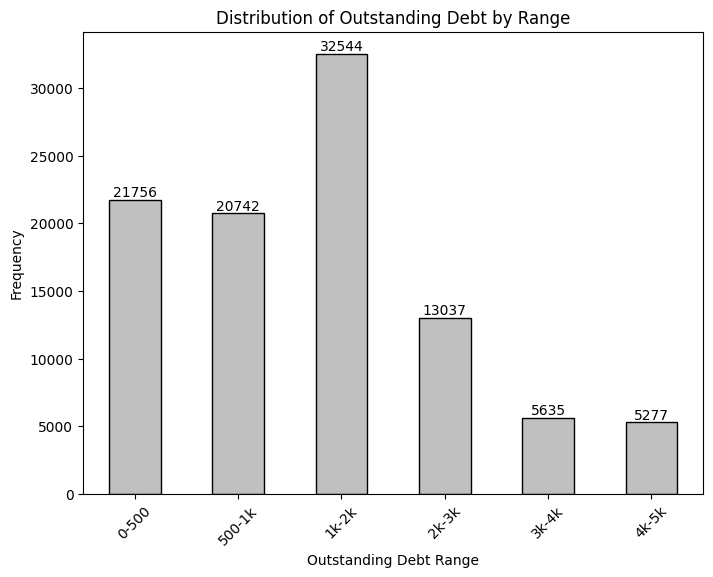

In [856]:
# Create a histogram for outstanding debt
credit_scores_dataset['Outstanding_Debt'] = pd.to_numeric(credit_scores_dataset['Outstanding_Debt'], errors='coerce')

# Define bins and labels for Outstanding_Debt
outstanding_debt_bins = [0, 500, 1000, 2000, 3000, 4000, 5000]
outstanding_debt_labels = ['0-500', '500-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k']
credit_scores_dataset['Outstanding_Debt_Range'] = pd.cut(credit_scores_dataset['Outstanding_Debt'], bins=outstanding_debt_bins, labels=outstanding_debt_labels, right=False)

# Count the occurrences of each debt range
outstanding_debt_counts = credit_scores_dataset['Outstanding_Debt_Range'].value_counts().sort_index()

# Plot the histogram for the binned data
plt.figure(figsize=(8, 6))
outstanding_debt_bar_plot = outstanding_debt_counts.plot(kind='bar', color='silver', edgecolor='black')

# Add labels to the bars
for bar in outstanding_debt_bar_plot.patches:
    outstanding_debt_bar_plot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribution of Outstanding Debt by Range')
plt.xlabel('Outstanding Debt Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


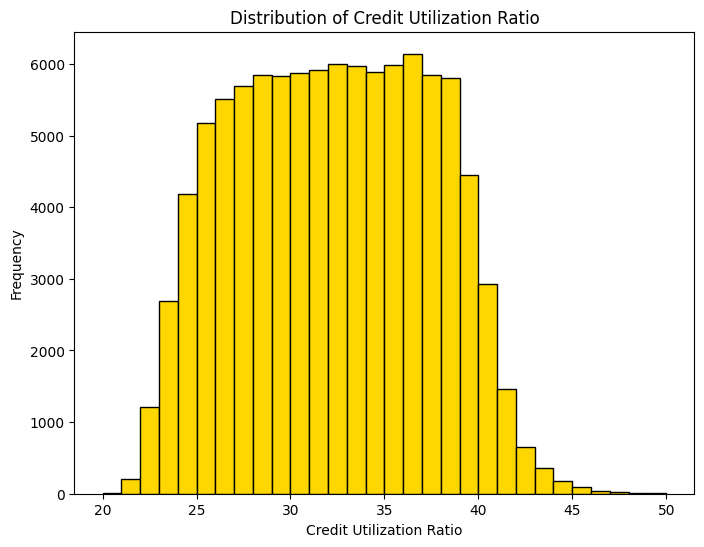

In [857]:
# Create a histogram for credit utilization ratio
plt.figure(figsize=(8, 6))
plt.hist(credit_scores_dataset['Credit_Utilization_Ratio'], bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

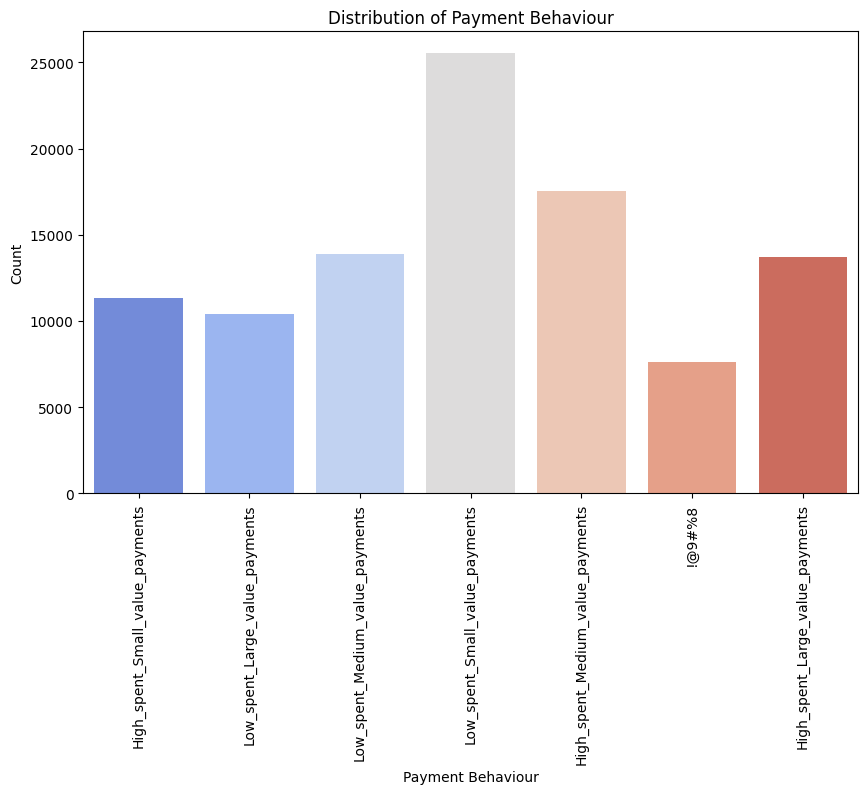

In [858]:
# Create a bar graph for payment behaviour
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Behaviour', hue='Payment_Behaviour', data=credit_scores_dataset, palette='coolwarm', legend=False)
plt.title('Distribution of Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

So I can see that most of my attributes have a fairly good distribution, however there are some with some outliers so I will have to find a way to handle these during preprocessing.

#### 4. Class Distribution Analysis
Here I will investigate the distribution of class labels within the dataset. I will assess whether the dataset is balanced or imbalanced based on the results.

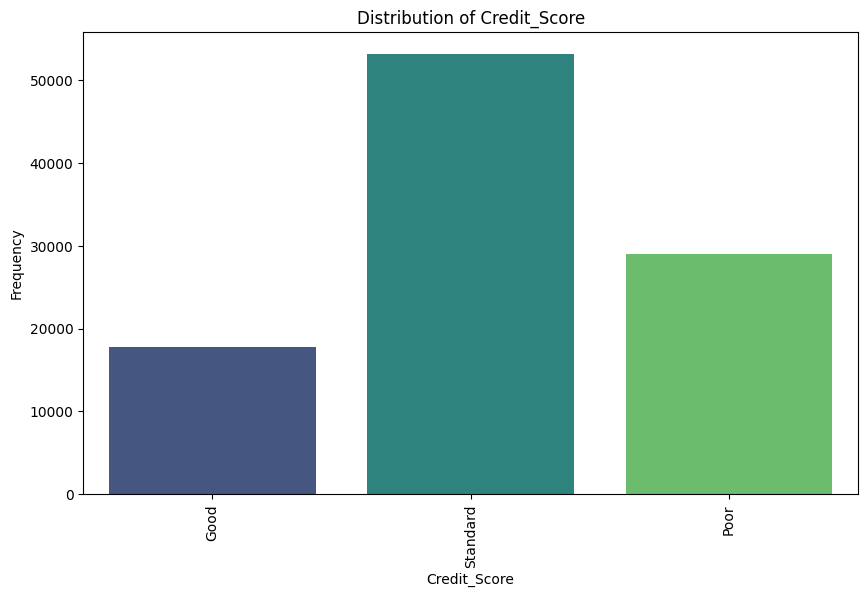

In [859]:
# Create a bar plot for class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Credit_Score', data=credit_scores_dataset, palette='viridis', legend=False)
plt.title(f'Distribution of Credit_Score')
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

So since each column has a fair representation, I would say my dataset is pretty balanced, the majority are standard credit scores but each label has a fair and understandable distribution here.

#### 5. Preprocessing
Here I will preprocess my data so that it is ready for classification.

##### 5.1 Numerical Features
Here I will do the preprocessing of my numerical features. I will start with annual income. For this, I know this column does not have any missing values based on my research from above, so I don't have to worry about that, but its distribution isn't ideal, so I will standardize the data to improve the distribution. I will also cap the outliers at the first and 98th percentile to also help with the distribution. I will display the distribution before and after the transformation to show the improvement.

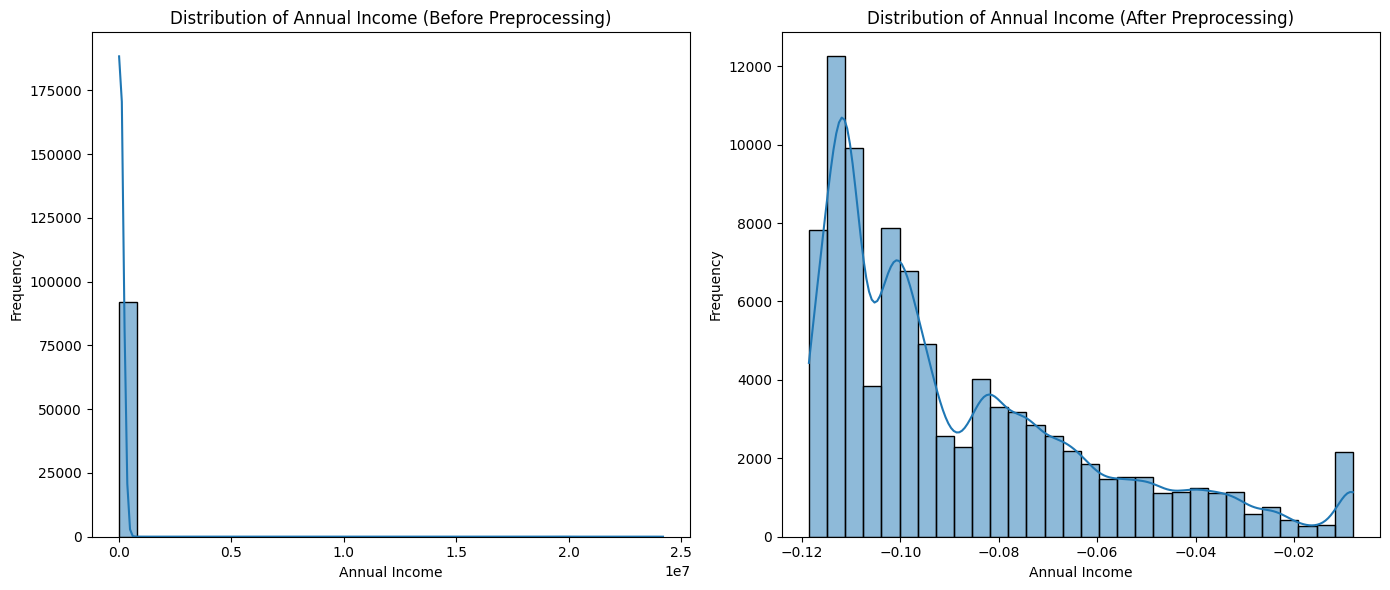

In [860]:
# Preprocessing annual income

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Annual_Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income (Before Preprocessing)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Preprocessing annual income
scaler = StandardScaler()
credit_scores_dataset['Annual_Income'] = scaler.fit_transform(credit_scores_dataset[['Annual_Income']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Annual_Income'].quantile(0.01)
upper_bound = credit_scores_dataset['Annual_Income'].quantile(0.98)
credit_scores_dataset['Annual_Income'] = credit_scores_dataset['Annual_Income'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Annual_Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income (After Preprocessing)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess the monthly inhand salary. This attribute had many missing values so I will use mean imputation as determined earlier. I will also standardize and clip outliers.

C:\Users\Owner\AppData\Local\Temp\ipykernel_28308\3628385697.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_scores_dataset['Monthly_Inhand_Salary'].fillna(mean_salary, inplace=True)


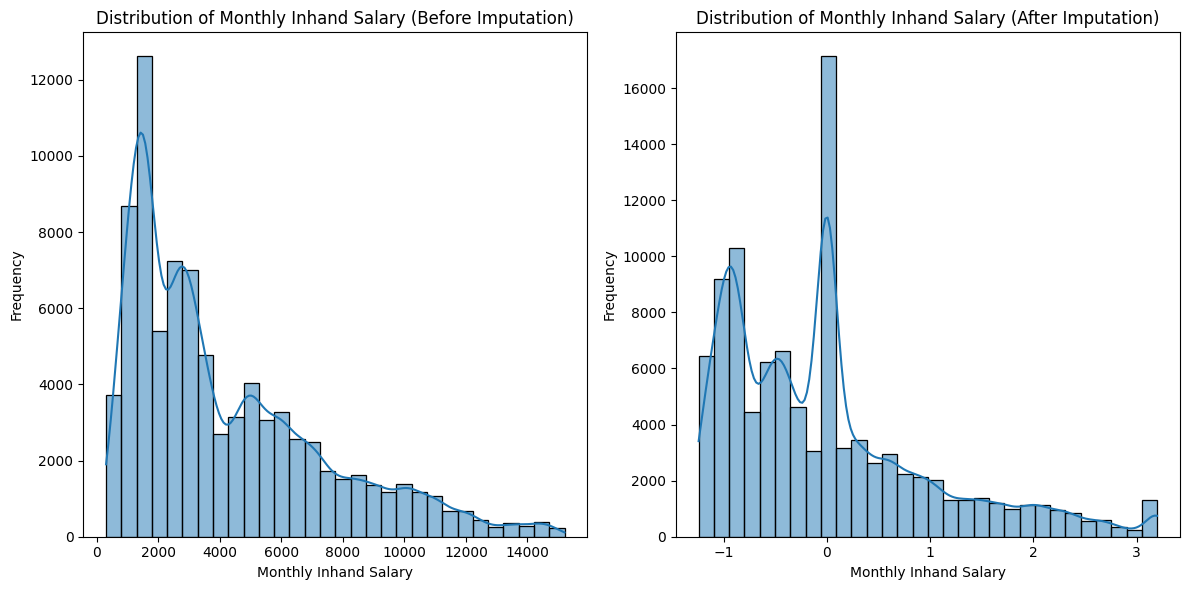

In [861]:
# Preprocessing monthly inhand salary

# Visualize distribution before preprocessing
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Before preprocessing
sns.histplot(credit_scores_dataset['Monthly_Inhand_Salary'], bins=30, kde=True)
plt.title('Distribution of Monthly Inhand Salary (Before Imputation)')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')

# Calculate mean
mean_salary = credit_scores_dataset['Monthly_Inhand_Salary'].mean()

# Impute missing values with the mean
credit_scores_dataset['Monthly_Inhand_Salary'].fillna(mean_salary, inplace=True)

# Preprocessing data
scaler = StandardScaler()
credit_scores_dataset['Monthly_Inhand_Salary'] = scaler.fit_transform(credit_scores_dataset[['Monthly_Inhand_Salary']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Monthly_Inhand_Salary'].quantile(0.01)
upper_bound = credit_scores_dataset['Monthly_Inhand_Salary'].quantile(0.99)
credit_scores_dataset['Monthly_Inhand_Salary'] = credit_scores_dataset['Monthly_Inhand_Salary'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2) # After preprocessing
sns.histplot(credit_scores_dataset['Monthly_Inhand_Salary'], bins=30, kde=True)
plt.title('Distribution of Monthly Inhand Salary (After Imputation)')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Next I will preprocess number of bank accounts, there were no missing values for this attribute so I don't have to worry about that. But the distribution wasn't great, so I will again standardize and I will also cap the outliers at the first and 99th percentile to also help with the distribution.

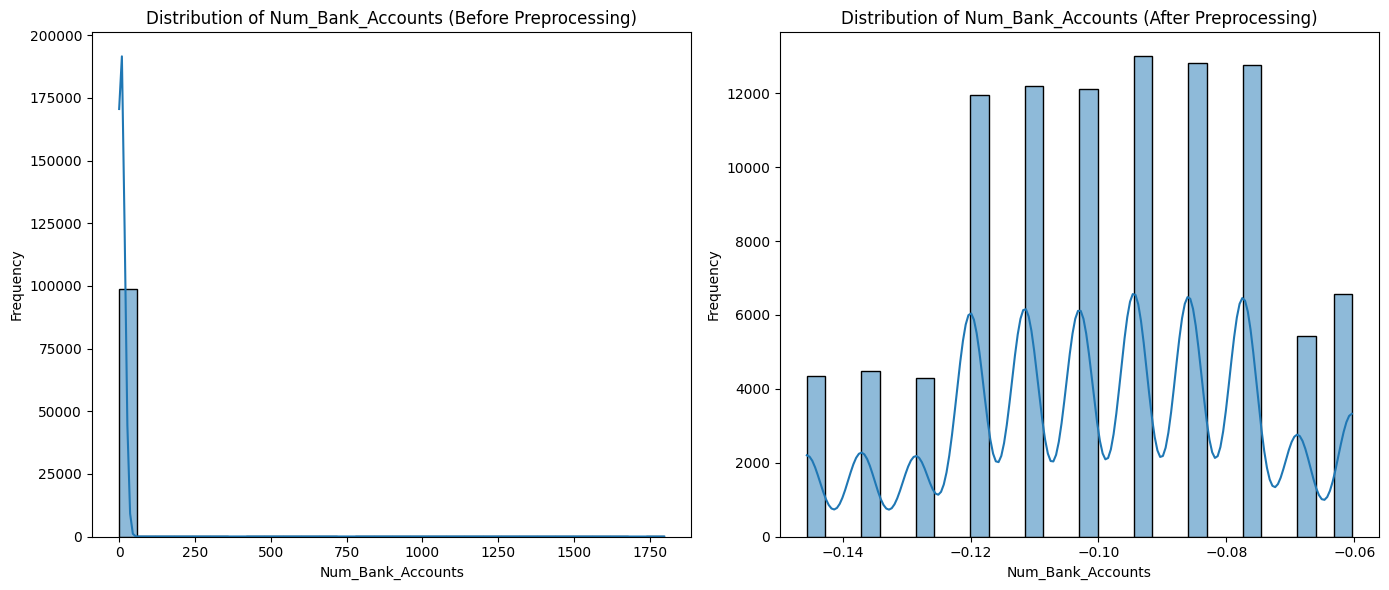

In [862]:
# Preprocessing number of bank accounts

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Num_Bank_Accounts'], bins=30, kde=True)
plt.title('Distribution of Num_Bank_Accounts (Before Preprocessing)')
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Frequency')

# Preprocessing data
scaler = StandardScaler()
credit_scores_dataset['Num_Bank_Accounts'] = scaler.fit_transform(credit_scores_dataset[['Num_Bank_Accounts']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Num_Bank_Accounts'].quantile(0.01)
upper_bound = credit_scores_dataset['Num_Bank_Accounts'].quantile(0.98)
credit_scores_dataset['Num_Bank_Accounts'] = credit_scores_dataset['Num_Bank_Accounts'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Num_Bank_Accounts'], bins=30, kde=True)
plt.title('Distribution of Num_Bank_Accounts (After Preprocessing)')
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess number of credit cards, I will treat this attribute the exact same as the previous one, it has no missing values but a poor distribution so I will standardize it and cap the limits to improve distribution.

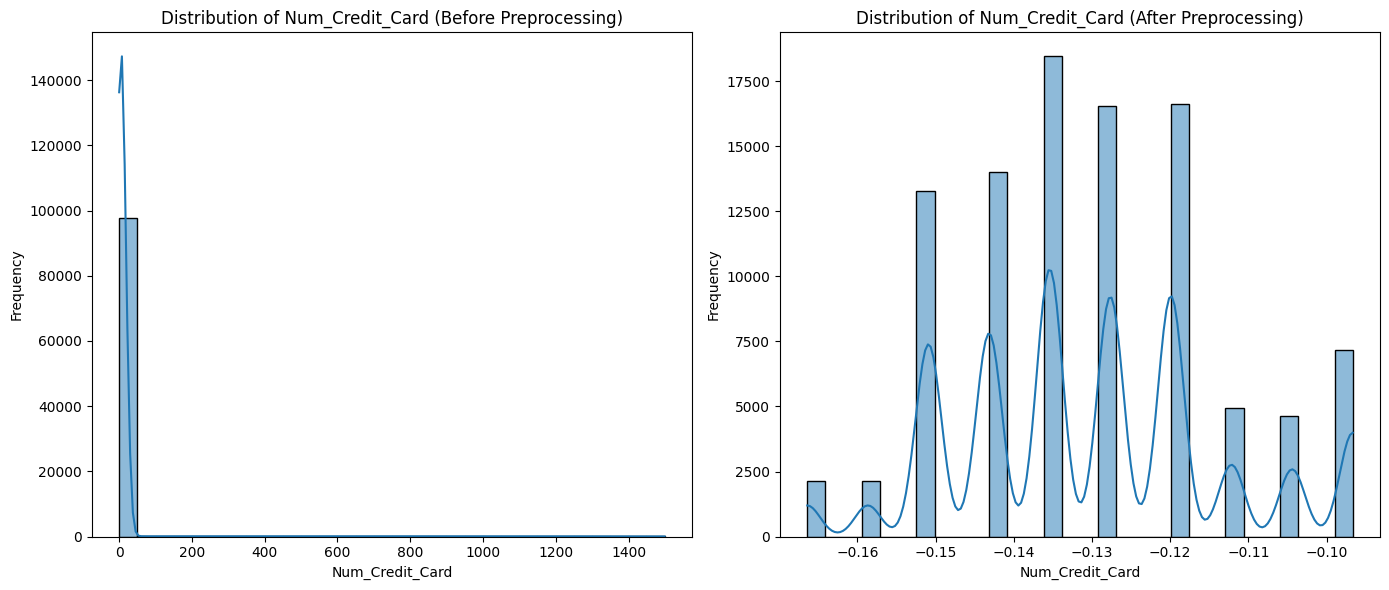

In [863]:
# Preprocessing number of credit cards

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Num_Credit_Card'], bins=30, kde=True)
plt.title('Distribution of Num_Credit_Card (Before Preprocessing)')
plt.xlabel('Num_Credit_Card')
plt.ylabel('Frequency')

# Preprocess data
scaler = StandardScaler()
credit_scores_dataset['Num_Credit_Card'] = scaler.fit_transform(credit_scores_dataset[['Num_Credit_Card']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Num_Credit_Card'].quantile(0.01)
upper_bound = credit_scores_dataset['Num_Credit_Card'].quantile(0.95)
credit_scores_dataset['Num_Credit_Card'] = credit_scores_dataset['Num_Credit_Card'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Num_Credit_Card'], bins=30, kde=True)
plt.title('Distribution of Num_Credit_Card (After Preprocessing)')
plt.xlabel('Num_Credit_Card')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess interest rates. This attribute also had no missing values, it also had a good distribution but a few outliers, so I will just cap the data to adjust for that.

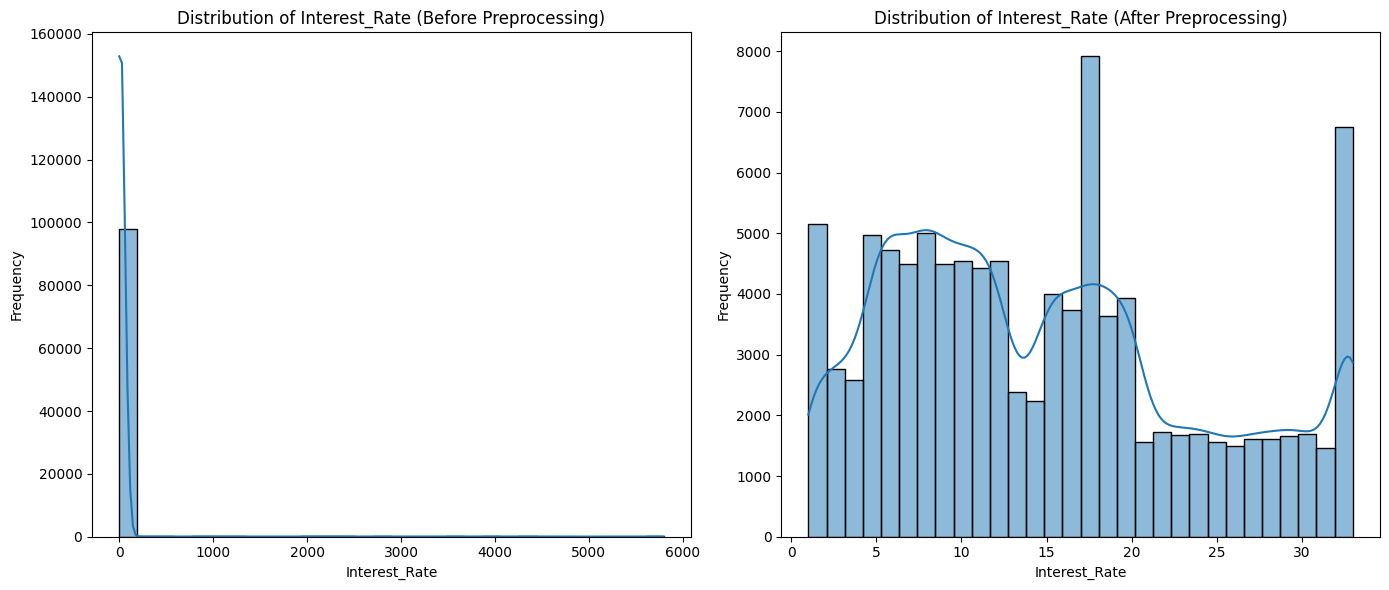

In [864]:
# Preprocessing interest rates

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Interest_Rate'], bins=30, kde=True)
plt.title('Distribution of Interest_Rate (Before Preprocessing)')
plt.xlabel('Interest_Rate')
plt.ylabel('Frequency')

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Interest_Rate'].quantile(0.01)
upper_bound = credit_scores_dataset['Interest_Rate'].quantile(0.95)
credit_scores_dataset['Interest_Rate'] = credit_scores_dataset['Interest_Rate'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Interest_Rate'], bins=30, kde=True)
plt.title('Distribution of Interest_Rate (After Preprocessing)')
plt.xlabel('Interest_Rate')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess number of loans. This attribute has no missing values but not a great distribution so I will standardize it and cap the ends to improve it.

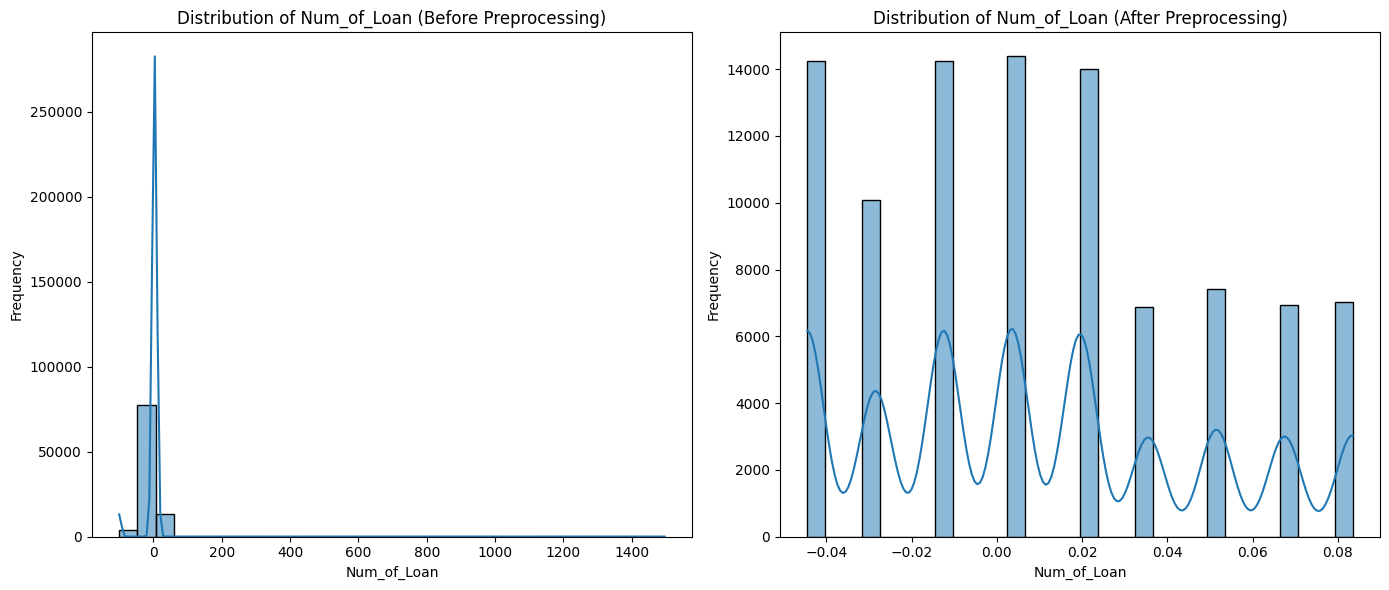

In [865]:
# Preprocessing number of loans

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Num_of_Loan'], bins=30, kde=True)
plt.title('Distribution of Num_of_Loan (Before Preprocessing)')
plt.xlabel('Num_of_Loan')
plt.ylabel('Frequency')

# Preprocess data
scaler = StandardScaler()
credit_scores_dataset['Num_of_Loan'] = scaler.fit_transform(credit_scores_dataset[['Num_of_Loan']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Num_of_Loan'].quantile(0.05)
upper_bound = credit_scores_dataset['Num_of_Loan'].quantile(0.95)
credit_scores_dataset['Num_of_Loan'] = credit_scores_dataset['Num_of_Loan'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Num_of_Loan'], bins=30, kde=True)
plt.title('Distribution of Num_of_Loan (After Preprocessing)')
plt.xlabel('Num_of_Loan')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess the number of delayed payments. This attribute has missing values, so I will use mean imputation here, I will also standardize and clip the outliers.

C:\Users\Owner\AppData\Local\Temp\ipykernel_28308\2492378336.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_scores_dataset['Num_of_Delayed_Payment'].fillna(mean_salary, inplace=True)


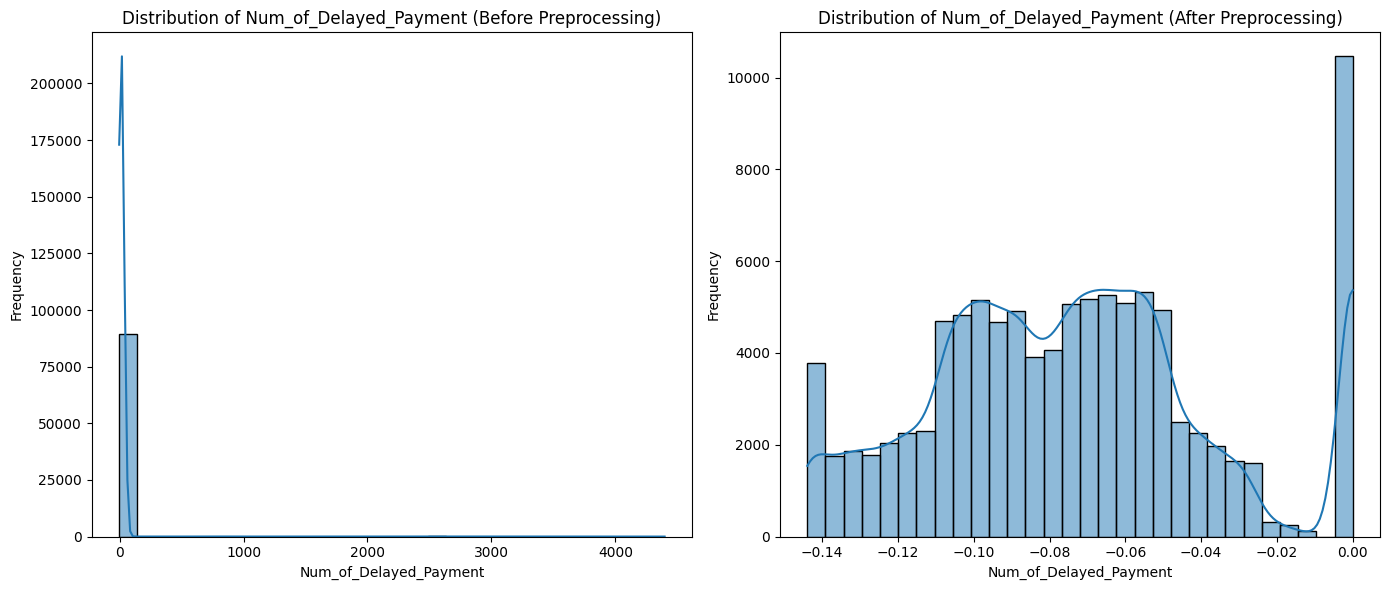

In [866]:
# Preprocessing number of delayed payments

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Num_of_Delayed_Payment'], bins=30, kde=True)
plt.title('Distribution of Num_of_Delayed_Payment (Before Preprocessing)')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Frequency')

# Calculate mean
mean_salary = credit_scores_dataset['Num_of_Delayed_Payment'].mean()

# Impute missing values with the mean
credit_scores_dataset['Num_of_Delayed_Payment'].fillna(mean_salary, inplace=True)

# Preprocess data
scaler = StandardScaler()
credit_scores_dataset['Num_of_Delayed_Payment'] = scaler.fit_transform(credit_scores_dataset[['Num_of_Delayed_Payment']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Num_of_Delayed_Payment'].quantile(0.01)
upper_bound = credit_scores_dataset['Num_of_Delayed_Payment'].quantile(0.99)
credit_scores_dataset['Num_of_Delayed_Payment'] = credit_scores_dataset['Num_of_Delayed_Payment'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Num_of_Delayed_Payment'], bins=30, kde=True)
plt.title('Distribution of Num_of_Delayed_Payment (After Preprocessing)')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess number of credit inquiries, I will use mean imputation, standardization and clipping outliers here again.

C:\Users\Owner\AppData\Local\Temp\ipykernel_28308\1990796895.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_scores_dataset['Num_Credit_Inquiries'].fillna(mean_salary, inplace=True)


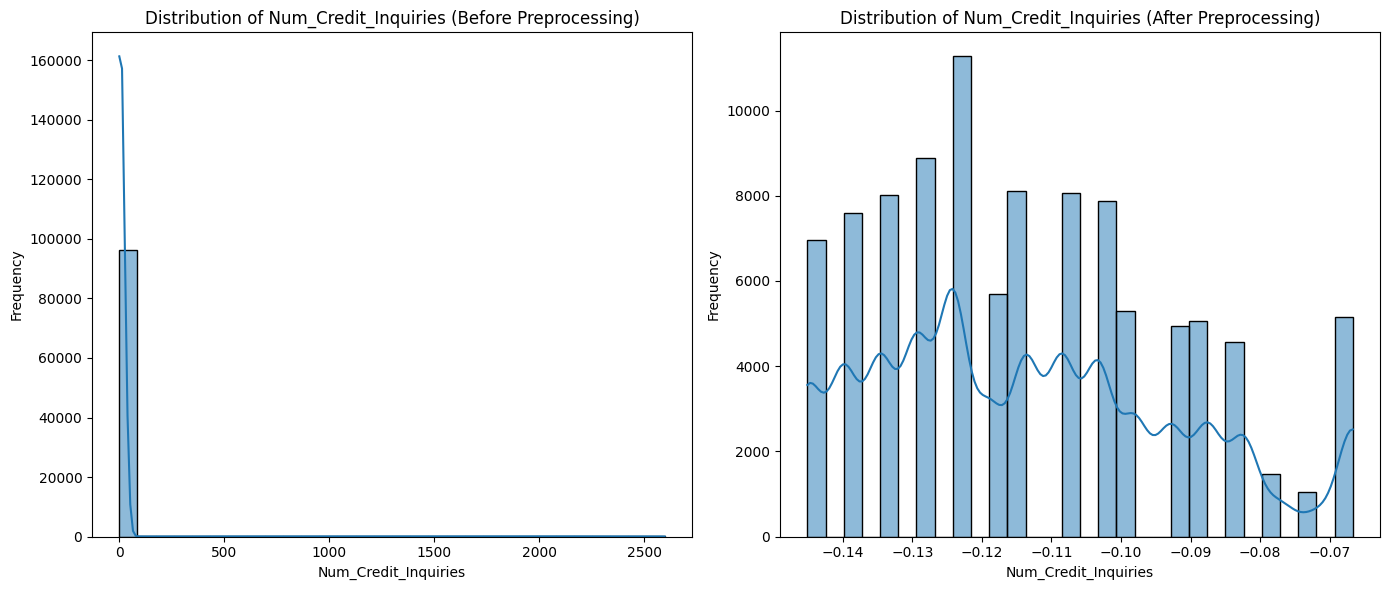

In [867]:
# Preprocessing number of credit inquiries

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Num_Credit_Inquiries'], bins=30, kde=True)
plt.title('Distribution of Num_Credit_Inquiries (Before Preprocessing)')
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Frequency')

# Calculate mean
mean_salary = credit_scores_dataset['Num_Credit_Inquiries'].mean()

# Impute missing values with the mean
credit_scores_dataset['Num_Credit_Inquiries'].fillna(mean_salary, inplace=True)

# Preprocess data
scaler = StandardScaler()
credit_scores_dataset['Num_Credit_Inquiries'] = scaler.fit_transform(credit_scores_dataset[['Num_Credit_Inquiries']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Num_Credit_Inquiries'].quantile(0.01)
upper_bound = credit_scores_dataset['Num_Credit_Inquiries'].quantile(0.95)
credit_scores_dataset['Num_Credit_Inquiries'] = credit_scores_dataset['Num_Credit_Inquiries'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Num_Credit_Inquiries'], bins=30, kde=True)
plt.title('Distribution of Num_Credit_Inquiries (After Preprocessing)')
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will preprocess outstanding debt, there were no missing values here so I will just standardize and clip the outliers.

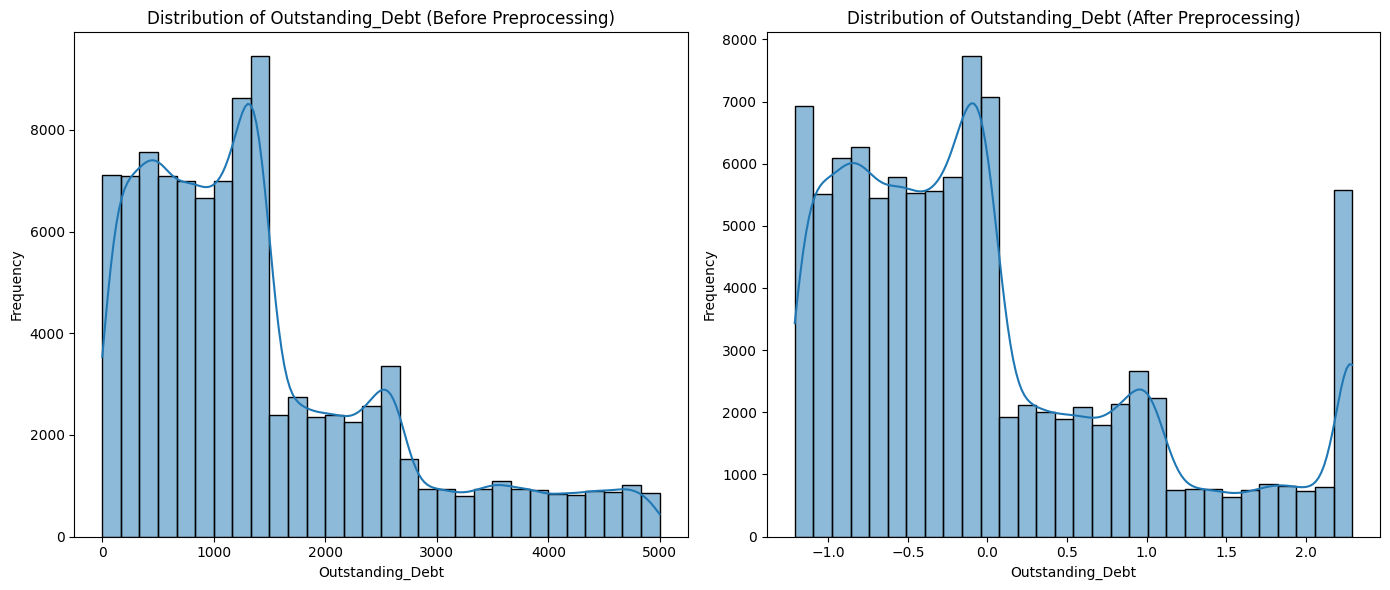

In [868]:
# Preprocessing outstanding debt

# Visualize distribution before preprocessing
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Before preprocessing
sns.histplot(credit_scores_dataset['Outstanding_Debt'], bins=30, kde=True)
plt.title('Distribution of Outstanding_Debt (Before Preprocessing)')
plt.xlabel('Outstanding_Debt')
plt.ylabel('Frequency')

# Preprocess data
scaler = StandardScaler()
credit_scores_dataset['Outstanding_Debt'] = scaler.fit_transform(credit_scores_dataset[['Outstanding_Debt']])

# Clip the values to remove outliers
lower_bound = credit_scores_dataset['Outstanding_Debt'].quantile(0.01)
upper_bound = credit_scores_dataset['Outstanding_Debt'].quantile(0.95)
credit_scores_dataset['Outstanding_Debt'] = credit_scores_dataset['Outstanding_Debt'].clip(lower_bound, upper_bound)

# Visualize distribution after preprocessing
plt.subplot(1, 2, 2)  # After preprocessing
sns.histplot(credit_scores_dataset['Outstanding_Debt'], bins=30, kde=True)
plt.title('Distribution of Outstanding_Debt (After Preprocessing)')
plt.xlabel('Outstanding_Debt')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Next I will consider credit utilization ratio. This attribute had no missing values and had a really good distribution so there is actually no preprocessing required for this attribute.

##### 5.2 Categorical Features
Here I will preprocess my only categorical attribute which is Payment Behaviour by applying one-hot encoding to it, I will also remove all rows with the value  "!@9#%8" because this value doesn't make sense and it was discovered in my bar graph in the previous section. The code will be below. I will also display the first 10 rows for the one-hot encoded columns to show it worked.

In [869]:
# Preprocessing payment behaviour

# Remove unwanted values
credit_scores_dataset = credit_scores_dataset[credit_scores_dataset['Payment_Behaviour'] != '!@9#%8']

# One-hot encode the 'Payment_Behaviour' column
credit_scores_dataset = pd.get_dummies(credit_scores_dataset, columns=['Payment_Behaviour'], drop_first=True)

# Print the first 10 rows of the new one-hot encoded columns
payment_columns = [col for col in credit_scores_dataset.columns if 'Payment_Behaviour_' in col]
print(credit_scores_dataset[payment_columns].head(10))


    Payment_Behaviour_High_spent_Medium_value_payments  \
0                                               False    
1                                               False    
2                                               False    
3                                               False    
4                                                True    
6                                               False    
7                                                True    
8                                               False    
9                                               False    
10                                              False    

    Payment_Behaviour_High_spent_Small_value_payments  \
0                                                True   
1                                               False   
2                                               False   
3                                               False   
4                                               False   
6                  

#### 6. Training and Target Data
Here I will set the Python variable X to designate the data and y to designate the target class which is my credit score attribute, and only select the features I need.

In [870]:
# Define the features (X) and the target (y)
X = credit_scores_dataset[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                           'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                           'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
                           'Outstanding_Debt', 'Credit_Utilization_Ratio'] + payment_columns] # Include one-hot encoded columns from above for payment behaviour

y = credit_scores_dataset['Credit_Score']  

#### 7. Training and Test Sets
Here I will split the dataset into training and testing sets and reserve 20% of data for testing.

In [871]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--------------------------------------------------------------------------

### References

